## Reading CIFAR-10 dataset from binary files

Although we can just loading CIFAR-10 dataset from Keras with load_data() function, 
we will perfom download of dataset from the site.
After that, we will read the files as binary files and prepare it as our dataset in Train, Validation and Test format.

In [1]:
# Importing needed libraries
import h5py
import numpy as np

from sklearn.utils import shuffle

# This path is location for the saved dataset folder with binary files
cifar10 = (r'C:\files locatipn...')

### Reading binary files and convert them to numpy arrays

In [2]:
# Preparing zero-valued Numpy array for cut objects
x_train = np.zeros((1, 32, 32, 3))

# Preparing zero-valued Numpy array for class indexes
y_train = np.zeros(1)

# Reading 5 binary files with images and class indexes for training
for i in range(1, 6):
    
    # Opening current file to read it in binary mode by 'rb'
    with open(cifar10+'\data_batch_' + str(i) + '.bin', 'rb') as bytestream:
        
        # Reading 10 000 images of 32x32 pixels each
        # Every image has its class index at the beginning
        data = bytestream.read(30730000)

        # Showing type of the data
        print(type(data))

        # Converting data into Numpy array
        data = np.frombuffer(data, dtype=np.uint8)

        # Showing type of the data after conversion
        print(type(data))

        # Reshaping data to 10 000 separate rows
        data = data.reshape(10000, 3073)

        # Extracting class indexes from every row
        y_temp = data[:, 0:1]

        # Reshaping Numpy array with class indexes
        y_temp = y_temp.reshape(10000)

        # Extracting images of 32x32 pixels each from every row
        x_temp = data[:, 1:].astype(np.float32)

        # to make every image as separate matrix of 32x32 pixels and 3 channels
        x_temp = x_temp.reshape(10000, 3, 32, 32)

        # Making channels come at the end
        x_temp = x_temp.transpose(0, 2, 3, 1)

        # Showing shapes of the data
        print(x_temp.shape)
        print(y_temp.shape)
        print()

    # Concatenating vertically temp arrays to main arrays
    x_train = np.concatenate((x_train, x_temp), axis=0)
    y_train = np.concatenate((y_train, y_temp), axis=0)

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)



### Showing Dataset Shape

In [3]:
# Showing shapes of the data
print(x_train.shape)
print(y_train.shape)
print()

# Slicing 1st zero-valued row
x_train = x_train[1:]
y_train = y_train[1:]

# Showing shapes of the data
print(x_train.shape)
print(y_train.shape)

(50001, 32, 32, 3)
(50001,)

(50000, 32, 32, 3)
(50000,)


### Reading the binary files of test

In [4]:
# Opening file to read it in binary mode by 'rb'
with open(cifar10+'/test_batch.bin', 'rb') as bytestream:
    
    # Reading 10 000 images of 32x32 pixels each
    # Every image has its class index at the beginning
    data = bytestream.read(30730000)

    # Showing type of the data
    print(type(data))

    # Converting data into Numpy array
    data = np.frombuffer(data, dtype=np.uint8)

    # Showing type of the data after conversion
    print(type(data))

    # Reshaping data to 10 000 separate rows
    data = data.reshape(10000, 3073)

    # Extracting class indexes from every row
    y_test = data[:, 0:1]

    # Reshaping Numpy array with class indexes
    y_test = y_test.reshape(10000)

    # Extracting images of 32x32 pixels each from every row
    x_test = data[:, 1:].astype(np.float32)

    # Reshaping Numpy array with images
    # to make every image as separate matrix of 32x32 pixels and 3 channels
    x_test = x_test.reshape(10000, 3, 32, 32)

    # Making channels come at the end
    x_test = x_test.transpose(0, 2, 3, 1)

    # Showing shapes of the data
    print(x_test.shape)
    print(y_test.shape)
    print()

<class 'bytes'>
<class 'numpy.ndarray'>
(10000, 32, 32, 3)
(10000,)



### Create the Train and Validation arrays

In [5]:
# Shuffling data along the first axis
# Saving appropriate connection: image --> label
x_train, y_train = shuffle(x_train, y_train)

# Slicing first 15% of elements from Numpy arrays for training
# Assigning sliced elements to validation Numpy arrays
x_validation = x_train[:int(x_train.shape[0] * 0.15), :, :, :]
y_validation = y_train[:int(y_train.shape[0] * 0.15)]

# Slicing last 85% of elements from Numpy arrays for training
# Re-assigning sliced elements to train Numpy arrays
x_train = x_train[int(x_train.shape[0] * 0.15):, :, :, :]
y_train = y_train[int(y_train.shape[0] * 0.15):]

### Saving prepared Numpy arrays into HDF5 binary file

In [6]:
# Creating file with name 'dataset_cifar10.hdf5' Opening it in writing mode by 'w'
with h5py.File('dataset_cifar10.hdf5', 'w') as f:
    
    # Saving Numpy arrays for training
    f.create_dataset('x_train', data=x_train, dtype='f') # f mean float
    f.create_dataset('y_train', data=y_train, dtype='i') # i mean integer

    # Saving Numpy arrays for validation
    f.create_dataset('x_validation', data=x_validation, dtype='f')
    f.create_dataset('y_validation', data=y_validation, dtype='i')

    # Saving Numpy arrays for testing
    f.create_dataset('x_test', data=x_test, dtype='f')
    f.create_dataset('y_test', data=y_test, dtype='i')

## Now after we created the dataset files lets plot images from it

### Import libraries

In [7]:
# Importing needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py

# This path is location for the saved dataset folder with binary files
cifar10_dataset = (r'C:\Work Space\PycharmProjects\CNNCourse\Dataset\cifar10\dataset_cifar10.hdf5')

### Reading saved CIFAR-10 dataset

In [8]:
# Opening file in reading mode by 'r'
with h5py.File('dataset_cifar10.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    # Extracting saved arrays for validation by appropriate keys saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    # Extracting saved arrays for testing by appropriate keys saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset

    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays

['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


### Showing types and shapes of loaded arrays

In [9]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()

# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(42500, 32, 32, 3)
(42500,)
(7500, 32, 32, 3)
(7500,)
(10000, 32, 32, 3)
(10000,)


### Reading classes' names

In [10]:
# Getting Pandas dataFrame from txt file with labels
labels = pd.read_csv('batches.meta.txt', header=None)

# Showing first 5 elements of the dataFrame
print(labels.head())
print()

# Showing 1st element
print(labels.loc[0, 0])

            0
0    airplane
1  automobile
2        bird
3         cat
4        deer

airplane


### Plotting 100 images from CIFAR-10 dataset

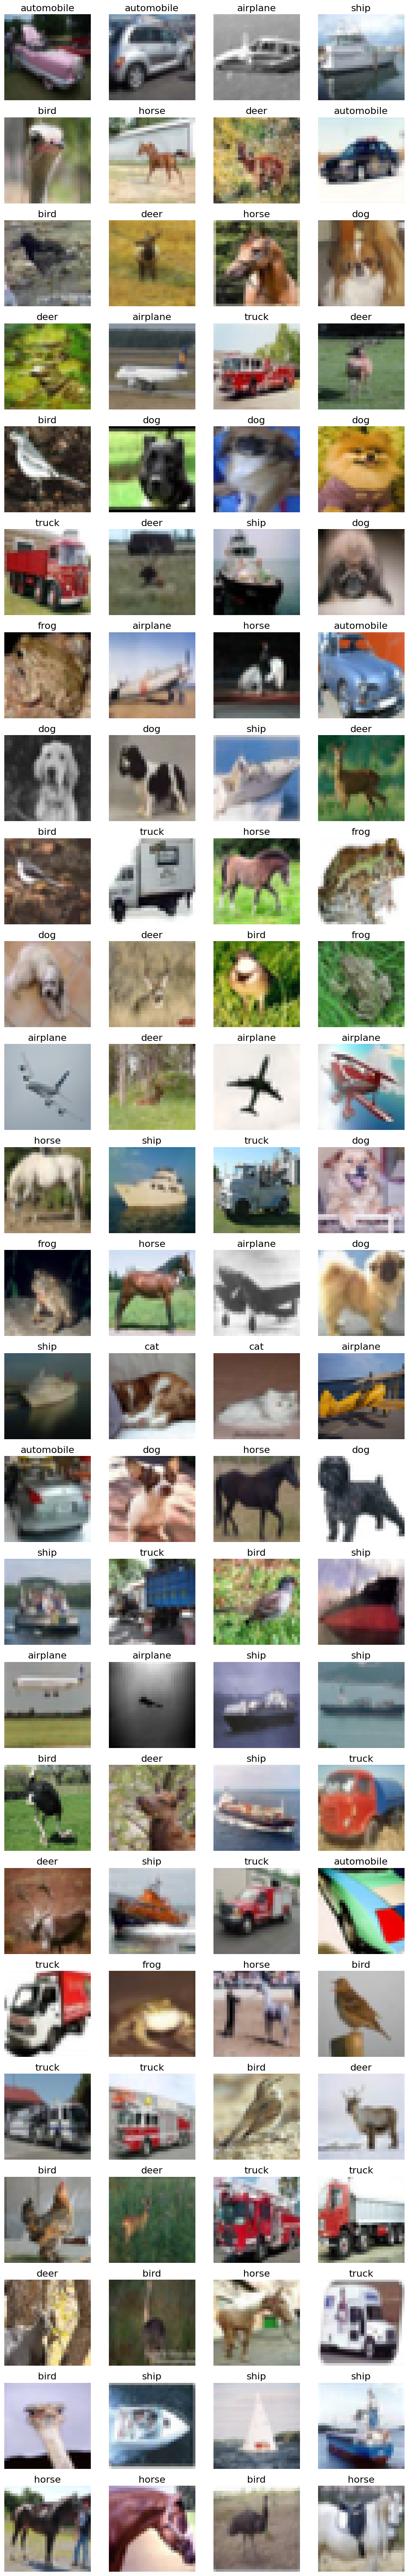

In [11]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 60.0)

# Defining a figure object with number of needed subplots
# ax is a (25, 4) numpy array
# To access specific subplot we call it by ax[0, 0]
figure, ax = plt.subplots(nrows=25, ncols=4)

# Plotting 100 examples along 25 rows and 4 columns
for i in range(25):
    for j in range(4):
        
        # Preparing random index
        ii = np.random.randint(low=0, high=x_train.shape[0])
        
        # Plotting current subplot
        ax[i, j].imshow(x_train[ii].astype('uint8'))
        
        # Giving name to current subplot according to class's name in dataFrame 'labels'
        ax[i, j].set_title(labels.loc[y_train[ii], 0], fontsize=16)
        
        # Hiding axis
        ax[i, j].axis('off')

# Adjusting distance between subplots
plt.tight_layout()

# Saving the plot
figure.savefig('plot_100_cifar10_images.png')

# Showing the plot
plt.show()

### Plotting histogram to show distribution of images among classes

classes indexes: [0 1 2 3 4 5 6 7 8 9]
classes frequency: [4245 4271 4244 4254 4227 4237 4255 4250 4245 4272]


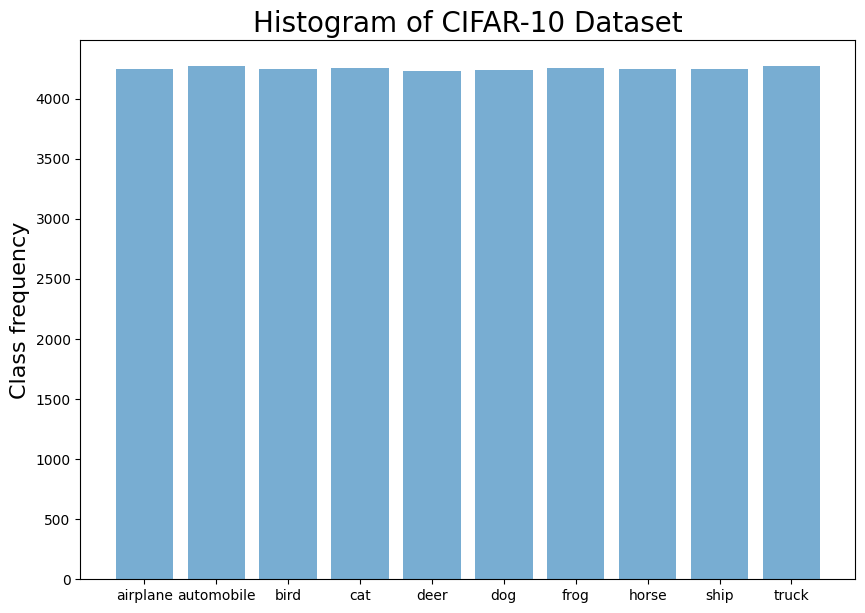

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 7.0)

# Calculating number of images for every class
# Function 'unique' returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_train, return_counts=True)

# Printing frequency (number of images) for every class
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

# Plotting histogram of 5 classes with their number of images
figure = plt.figure()

# Plotting Bar chart
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.6)

# Giving name to Y axis
plt.ylabel('Class frequency', fontsize=16)

# Giving names to every Bar along X axis
plt.xticks(classesIndexes, np.array(labels).flatten().tolist(), fontsize=10)

# Giving name to the plot
plt.title('Histogram of CIFAR-10 Dataset', fontsize=20)

# Saving the plot
figure.savefig('histogram_cifar10_images.png')

# Showing the plot
plt.show()